In [5]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

### Use env project_nlp

In [6]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [7]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [9]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [10]:
X = df['canonical_smiles']
y = df['pIC50']
df.head(1)

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939


In [11]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))
max_sequence_len = df['canonical_len'].max()

In [12]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado
tokenizer = Tokenizer(
    num_words = None,
    filters='',
    lower=False,
    split=' ',
    char_level=True,
    oov_token=None)

tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

X_seq_pad = pad_sequences(X_seq, maxlen=max_sequence_len)

In [13]:
len(tokenizer.word_index)

38

# Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [16]:
len(X_train), len(y_train), len(X_test)

(4530, 4530, 1133)

# Network Model

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [18]:
# Métrica
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [19]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(tokenizer.word_index)
vocab_size

38

In [20]:
max_sequence_len = df['canonical_len'].max()
max_sequence_len

207

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [78]:
embed_dim = 128 #32 #64 #128
nb_words = vocab_size

model = Sequential(name='LSTM_1')
model.add(Embedding(nb_words + 1 , embed_dim, input_length=max_sequence_len, trainable=True))
model.add(Bidirectional(LSTM(100, activation='tanh')))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dense(1))

# Implementar modelo completo
model.summary()

Model: "LSTM_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 207, 128)          4992      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               183200    
_________________________________________________________________
dense_6 (Dense)              (None, 50)                10050     
_________________________________________________________________
batch_normalization_3 (Batch (None, 50)                200       
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 198,493
Trainable params: 198,393
Non-trainable params: 100
____________________________________________________

In [79]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[R2])

In [80]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [81]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

In [82]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
71/71 [==============================] - 82s 1s/step - loss: 26.3737 - R2: -9.8720 - val_loss: 11.8319 - val_R2: -3.3537
Epoch 2/100
71/71 [==============================] - 53s 752ms/step - loss: 11.3523 - R2: -3.7420 - val_loss: 5.8233 - val_R2: -1.0733
Epoch 3/100
71/71 [==============================] - 110s 2s/step - loss: 5.2126 - R2: -1.1108 - val_loss: 10.7638 - val_R2: -2.9793
Epoch 4/100
71/71 [==============================] - 93s 1s/step - loss: 3.1000 - R2: -0.2301 - val_loss: 6.0634 - val_R2: -1.2112
Epoch 5/100
71/71 [==============================] - 89s 1s/step - loss: 2.5393 - R2: 0.0011 - val_loss: 3.0437 - val_R2: -0.0526
Epoch 6/100
71/71 [==============================] - 89s 1s/step - loss: 2.4311 - R2: 0.0515 - val_loss: 2.8493 - val_R2: 0.0326
Epoch 7/100
71/71 [==============================] - 103s 1s/step - loss: 2.3556 - R2: 0.0843 - val_loss: 7.1984 - val_R2: -1.6390
Epoch 8/100
71/71 [==============================] - 91s 1s/step - loss: 2.187

In [83]:
y_pred = model.predict(X_test)

# Score

In [84]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [85]:
r2
# 0.4984533246797399

0.6675838195169012

In [86]:
model.save('models/embed_128_bi_lstm_100_dense_50_bn_77_epohs.h5')

# Load model (solo si se grabo el modelo)

In [87]:
from tensorflow.keras.models import load_model

In [88]:
model_loaded = load_model('models\embed_128_bi_lstm_100_dense_50_bn_77_epohs.h5', custom_objects={'R2': R2})

In [89]:
y_pred = model_loaded.predict(X_test)

In [90]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.6675838195169012

¿Hasta que valores de r2 logró?

0.66758

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

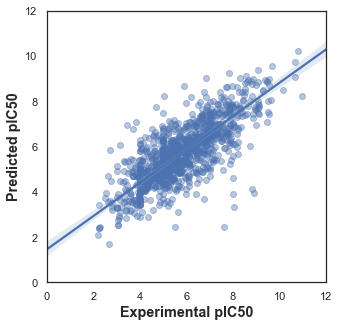

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show